In [121]:
using DelimitedFiles
using Plots
redWinePath = "/home/minhhn/Documents/ML/Dataset/Wine/winequality-red.csv"
whiteWinePath = "/home/minhhn/Documents/ML/Dataset/Wine/winequality-white.csv"

"/home/minhhn/Documents/ML/Dataset/Wine/winequality-white.csv"

$$ 

(R'R)^{-1}R'y = x

$$

In [122]:
function readData(path)
    A, header = readdlm(path, ';', Float64; header=true)
    N = length(A[:,1])
    X = [ones(N) A[:,1:end-1]]
    y = A[:,end]
    X, y
end

readData (generic function with 1 method)

In [123]:
red_X, red_y =readData(redWinePath)

([1.0 7.4 … 0.56 9.4; 1.0 7.8 … 0.68 9.8; … ; 1.0 5.9 … 0.71 10.2; 1.0 6.0 … 0.66 11.0], [5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 7.0, 7.0, 5.0  …  5.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 5.0, 6.0])

In [124]:
white_X, white_y =readData(whiteWinePath)

([1.0 7.0 … 0.45 8.8; 1.0 6.3 … 0.49 9.5; … ; 1.0 5.5 … 0.38 12.8; 1.0 6.0 … 0.32 11.8], [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0  …  5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 5.0, 6.0, 7.0, 6.0])

In [150]:
function train(X, y)
    inv(X'*X)*X'*y
end

evaluate (generic function with 2 methods)

In [126]:
red_θ = train(red_X, red_y)

12-element Vector{Float64}:
  21.965208486712072
   0.024990552704593938
  -1.0835902586688206
  -0.1825639484086139
   0.016331269780017976
  -1.874225158032857
   0.004361333308811222
  -0.0032645797029687285
 -17.88116387077025
  -0.4136531436406585
   0.916334412770226
   0.2761976991916697

In [127]:
white_θ = train(white_X, white_y)

12-element Vector{Float64}:
  150.19284250563942
    0.0655199613734112
   -1.8631770921492148
    0.02209020068677603
    0.08148280264647667
   -0.24727653661443583
    0.0037327651921743588
   -0.0002857474186271636
 -150.28418062790297
    0.6863437418801368
    0.6314764727421789
    0.19347569718263458

Do kết quả của bài toán có 10 loại, tương ứng có 9 ngưỡng ϵ. Nếu kết quả dự đoán có phần thực < ϵ ta làm tròn xuống và ngược lại. Do đó có thể cải thiện độ chính xác bằng cách điều chỉnh các ϵ này. 

Ta thực hiện dự đoán thử và đánh giá với ϵ = 0.5 của hàm round.

In [165]:
t = abs.(round.(red_X * red_θ) - red_y)

1599-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 2.0
 2.0
 1.0
 ⋮
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0

Những phần tử có giá trị là 1 có nghĩa là có thể chọn ϵ phù hợp để được kết qua đúng, tăng độ chính xác của mô hình (chưa làm được). Những phần tử có giá trị là 2 hoặc hơn là những phần tử được dự đoán sai do hạn chế của mô hình. Ta tính max accuracy khi sử dụng mô hình này:

In [163]:
red_N = length(red_y)
(red_N - sum(t .>= 2)) / red_N

0.9693558474046279

In [306]:
function round2(x, threshold)
    if x - floor(x) < threshold 
        return floor(x)
    else 
        return ceil(x)
    end       
end

function classify(X, θ, ϵs=0.5)
    z = X*θ
    round2.(z, ϵs)
end

function evaluate(X, y, θ, ϵ=0.5)
    ŷ = classify(X, θ, ϵ)
    sum(ŷ .== y)/length(y)
end

# tmp = [0.5 for i=1:1:10]
# for i=1:1:10
#     ϵs = 0:0.01:1
#     accs = [evaluate(red_X[red_y .== i, :], red_y[red_y .== i], red_θ, ϵ) for ϵ ∈ ϵs]
#     d = argmax(accs)*0.01 - 0.01
#     tmp[i] = d != 0.0 ? d : 0.5
# end
# print(tmp)

evaluate(red_X, red_y, red_θ)

0.5916197623514696

In [307]:
evaluate(white_X, white_y, white_θ)

0.5187831768068599

predict red_y dua vao red_θ va nguoc lai sau đó tính accuracy

In [310]:
accuracy_ŷ2 = evaluate(red_X, red_y, white_θ)

0.3420888055034397

In [311]:
accuracy_ŷ2 = evaluate(white_X, white_y, red_θ)

0.5202123315639037

Biểu đồ của độ chính xác phụ thuộc vào epsilon

In [312]:
ϵs = 0.4:0.005:0.7
accs = [evaluate(red_X, red_y, red_θ, ϵ) for ϵ ∈ ϵs]

61-element Vector{Float64}:
 0.5941213258286429
 0.5966228893058161
 0.5959974984365228
 0.5941213258286429
 0.5916197623514696
 0.590368980612883
 0.592245153220763
 0.5947467166979362
 0.5997498436522827
 0.6010006253908693
 ⋮
 0.5766103814884302
 0.5791119449656035
 0.5791119449656035
 0.5803627267041901
 0.5803627267041901
 0.5797373358348968
 0.5784865540963102
 0.575984990619137
 0.5734834271419638

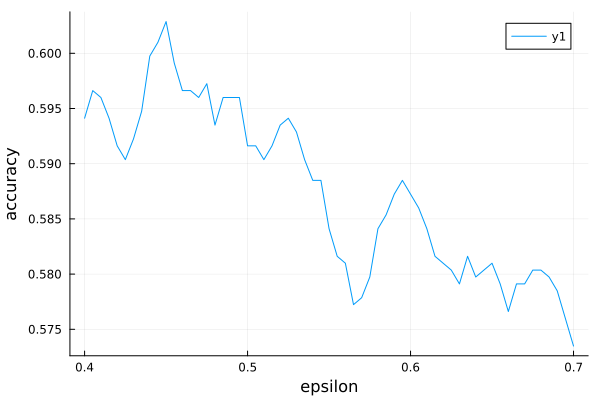

In [316]:
plot(ϵs, accs, xlabel = "epsilon", ylabel = "accuracy")